# **Preparations**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

base_dir = '/content/drive/MyDrive/Tomato'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/valid'))

Contents of base directory:
['valid', 'train']

Contents of train directory:
['damaged', 'old', 'ripe', 'unripe']

Contents of validation directory:
['unripe', 'ripe', 'damaged', 'old']


In [3]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

# Directory with training pictures
train_damaged_dir = os.path.join(train_dir, 'damaged')
train_unripe_dir = os.path.join(train_dir, 'unripe')
train_ripe_dir = os.path.join(train_dir, 'ripe')
train_old_dir = os.path.join(train_dir, 'old')

# Directory with validation pictures
validation_damaged_dir = os.path.join(validation_dir, 'damaged')
validation_unripe_dir = os.path.join(validation_dir, 'unripe')
validation_ripe_dir = os.path.join(validation_dir, 'ripe')
validation_old_dir = os.path.join(validation_dir, 'old')

In [4]:
train_damaged_fnames = os.listdir(train_damaged_dir)
train_unripe_fnames = os.listdir(train_unripe_dir)
train_ripe_fnames = os.listdir(train_ripe_dir)
train_old_fnames = os.listdir(train_old_dir)

print(train_damaged_fnames[:10])
print(train_unripe_fnames[:10])
print(train_ripe_fnames[:10])
print(train_old_fnames[:10])

['IMG_20220604_092712.jpg', 'IMG_20220524_081235.jpg', 'IMG_20220524_081233.jpg', 'IMG_20220604_092709.jpg', 'IMG_20220604_092724.jpg', 'IMG_20220612_151123.jpg', 'IMG_20220612_151128.jpg', 'IMG_20220604_092715.jpg', 'IMG_20220612_151129.jpg']
['IMG_20220506_093205.jpg', 'IMG_20220506_093233.jpg', 'IMG_20220506_093238.jpg', 'IMG_20220506_093220.jpg', 'IMG_20220506_093244.jpg', 'IMG_20220506_093242.jpg', 'IMG_20220506_093357.jpg', 'IMG_20220506_093401.jpg', 'IMG_20220506_093354.jpg', 'IMG_20220506_093306.jpg']
['IMG_20220511_090201.jpg', 'IMG_20220511_090205.jpg', 'IMG_20220511_090203.jpg', 'IMG_20220511_090154.jpg', 'IMG_20220511_090245.jpg', 'IMG_20220511_090243.jpg', 'IMG_20220511_090210.jpg', 'IMG_20220511_090216.jpg', 'IMG_20220511_090208.jpg', 'IMG_20220511_090303.jpg']
['IMG_20220524_081214.jpg', 'IMG_20220524_081213.jpg', 'IMG_20220524_081216.jpg', 'IMG_20220524_081215.jpg', 'IMG_20220524_081244.jpg', 'IMG_20220524_081225.jpg', 'IMG_20220524_081240.jpg', 'IMG_20220524_081245.jpg

In [5]:
print('total training `damaged` images:', len(os.listdir(train_damaged_dir)))
print('total training `unripe` images:', len(os.listdir(train_unripe_dir)))
print('total training `ripe` images:', len(os.listdir(train_ripe_dir)))
print('total training `old` images:', len(os.listdir(train_old_dir)))

print('total validation `damaged` images:', len(os.listdir(validation_damaged_dir)))
print('total validation `unripe` images:', len(os.listdir(validation_unripe_dir)))
print('total validation `ripe` images:', len(os.listdir(validation_ripe_dir)))
print('total validation `old` images:', len(os.listdir(validation_old_dir)))

total training `damaged` images: 9
total training `unripe` images: 49
total training `ripe` images: 476
total training `old` images: 487
total validation `damaged` images: 13
total validation `unripe` images: 20
total validation `ripe` images: 76
total validation `old` images: 121


In [6]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 8
ncols = 4

pic_index = 0

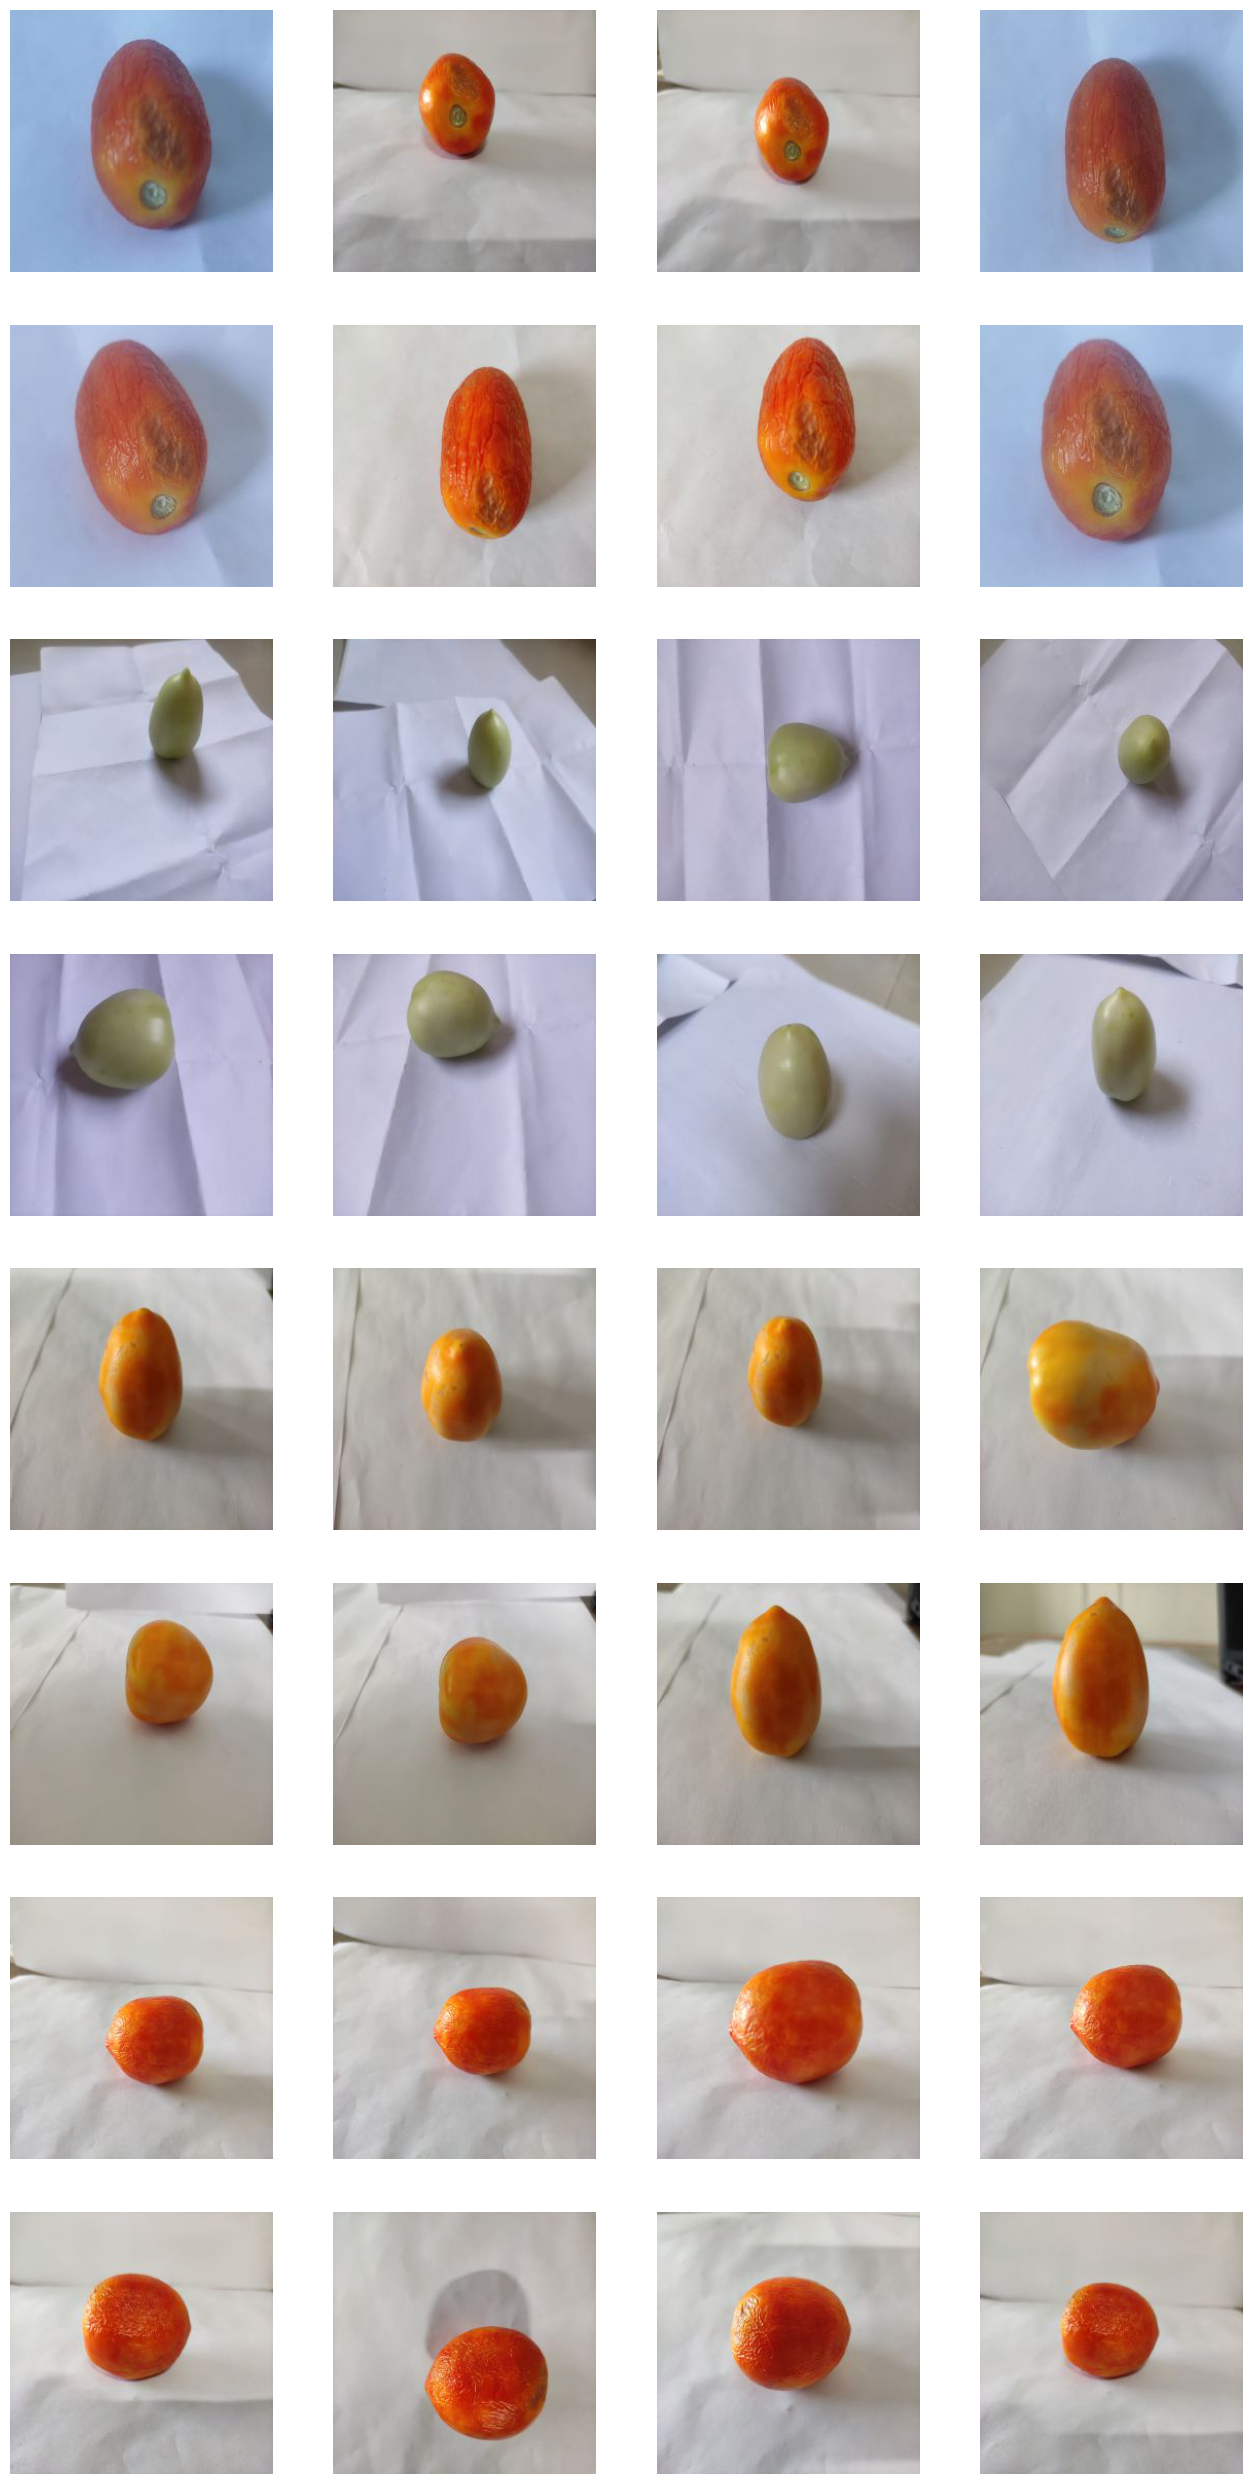

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_damaged_pix = [os.path.join(train_damaged_dir, fname) 
                for fname in train_damaged_fnames[pic_index-8 : pic_index] 
               ]

next_unripe_pix = [os.path.join(train_unripe_dir, fname) 
                for fname in train_unripe_fnames[ pic_index-8 : pic_index]
               ]

next_ripe_pix = [os.path.join(train_ripe_dir, fname) 
                for fname in train_ripe_fnames[pic_index-8 : pic_index] 
               ]

next_old_pix = [os.path.join(train_old_dir, fname) 
                for fname in train_old_fnames[ pic_index-8 : pic_index]
               ]

for i, img_path in enumerate(next_damaged_pix + next_unripe_pix + next_ripe_pix + next_old_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [10]:
from google.colab import files

# **Self-Created Model Arch with Non-Augmented Data & No Callback(s)**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(150, 150))

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
    )

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Self-Created Model Arch with Non-Augmented Data & No Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Self-Created Model Arch with Non-Augmented Data & No Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **Self-Created Model Arch with Augmented Data & Callback(s)**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=80,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(150, 150))

In [ ]:
# Defining Callbacks

# Save the best model
file_path = '/content/checkpoint/self_created'
checkpoint_callback = ModelCheckpoint(filepath=file_path, save_best_only=True, monitor='val_accuracy', verbose=2)

# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=2, min_lr=1e-6)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
    )

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Self-Created Model Arch with Augmented Data & Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Self-Created Model Arch with Augmented Data & Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **Transfer Learning (Xception) with Augmented Data & Callback(s)**

In [11]:
from tensorflow.keras.applications import Xception

In [12]:
model = tf.keras.models.Sequential([
    # Xception Layer
    Xception(include_top=False, weights='imagenet', input_shape=(224, 224, 3)),
    # Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(4, activation='softmax') 
])

model.layers[0].trainable = False

83683744/83683744 [==============================] - 5s 0us/step


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21,387,052
Trainable params: 525,572
Non-trainable params: 20,861,480
______________________________________

In [14]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=80,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

In [16]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(224, 224))

Found 1021 images belonging to 4 classes.
Found 230 images belonging to 4 classes.


In [17]:
# Defining Callbacks

# Save the best model
file_path = '/content/checkpoint/xception'
checkpoint_callback = ModelCheckpoint(filepath=file_path, save_best_only=True, monitor='val_accuracy', verbose=2)

# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=2, min_lr=1e-6)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [18]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
    )

Epoch 1/50
32/32 [==============================] - ETA: 0s - loss: 1.4667 - accuracy: 0.7179
Epoch 1: val_accuracy improved from -inf to 0.75217, saving model to /content/checkpoint/xception
32/32 [==============================] - 210s 6s/step - loss: 1.4667 - accuracy: 0.7179 - val_loss: 0.8216 - val_accuracy: 0.7522 - lr: 0.0010
Epoch 2/50
32/32 [==============================] - ETA: 0s - loss: 0.3917 - accuracy: 0.8717
Epoch 2: val_accuracy improved from 0.75217 to 0.86522, saving model to /content/checkpoint/xception
32/32 [==============================] - 35s 1s/step - loss: 0.3917 - accuracy: 0.8717 - val_loss: 0.5272 - val_accuracy: 0.8652 - lr: 0.0010
Epoch 3/50
32/32 [==============================] - ETA: 0s - loss: 0.3305 - accuracy: 0.8766
Epoch 3: val_accuracy did not improve from 0.86522
32/32 [==============================] - 16s 489ms/step - loss: 0.3305 - accuracy: 0.8766 - val_loss: 0.4478 - val_accuracy: 0.8652 - lr: 0.0010
Epoch 4/50
32/32 [====================

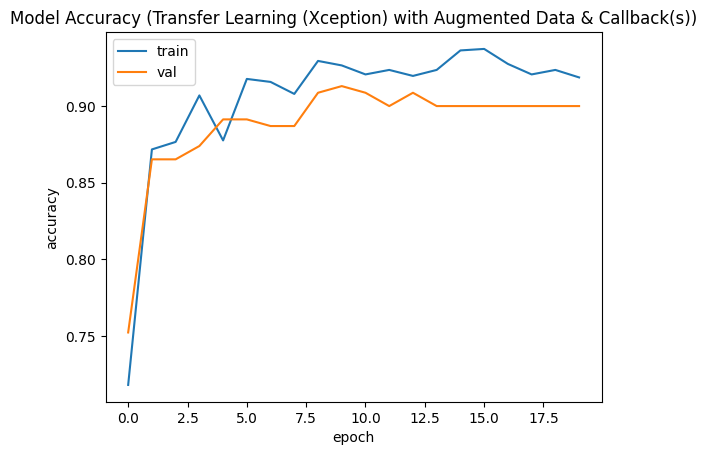

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Transfer Learning (Xception) with Augmented Data & Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

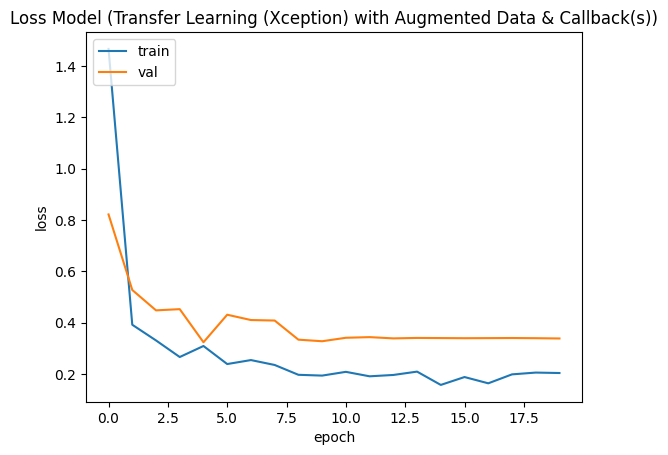

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Transfer Learning (Xception) with Augmented Data & Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
!zip -r /content/tomato_xception.zip /content/checkpoint/xception

  adding: content/checkpoint/xception/ (stored 0%)
  adding: content/checkpoint/xception/variables/ (stored 0%)
  adding: content/checkpoint/xception/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/checkpoint/xception/variables/variables.index (deflated 76%)
  adding: content/checkpoint/xception/assets/ (stored 0%)
  adding: content/checkpoint/xception/fingerprint.pb (stored 0%)
  adding: content/checkpoint/xception/saved_model.pb (deflated 92%)
  adding: content/checkpoint/xception/keras_metadata.pb (deflated 96%)


In [22]:
files.download("/content/tomato_xception.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Transfer Learning (MobileNetV2) with Augmented Data & Callback(s)**

In [23]:
from tensorflow.keras.applications import MobileNetV2

In [24]:
model = tf.keras.models.Sequential([
    # MobileNetV2 Layer
    MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3)),
    # Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(4, activation='softmax') 
])

model.layers[0].trainable = False

9406464/9406464 [==============================] - 2s 0us/step


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_max_pooling2d_1 (Glo  (None, 1280)             0         
 balMaxPooling2D)                                                
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               327936    
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 2,586,948
Trainable params: 328,964
Non-

In [26]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [27]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=80,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

In [28]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(224, 224))

Found 1021 images belonging to 4 classes.
Found 230 images belonging to 4 classes.


In [29]:
# Defining Callbacks

# Save the best model
file_path = '/content/checkpoint/mobilenetv2'
checkpoint_callback = ModelCheckpoint(filepath=file_path, save_best_only=True, monitor='val_accuracy', verbose=2)

# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=2, min_lr=1e-6)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [30]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
    )

Epoch 1/50
32/32 [==============================] - ETA: 0s - loss: 2.3537 - accuracy: 0.6866
Epoch 1: val_accuracy improved from -inf to 0.83478, saving model to /content/checkpoint/mobilenetv2
32/32 [==============================] - 41s 1s/step - loss: 2.3537 - accuracy: 0.6866 - val_loss: 0.9830 - val_accuracy: 0.8348 - lr: 0.0010
Epoch 2/50
32/32 [==============================] - ETA: 0s - loss: 0.4288 - accuracy: 0.8688
Epoch 2: val_accuracy improved from 0.83478 to 0.83913, saving model to /content/checkpoint/mobilenetv2
32/32 [==============================] - 37s 1s/step - loss: 0.4288 - accuracy: 0.8688 - val_loss: 0.5757 - val_accuracy: 0.8391 - lr: 0.0010
Epoch 3/50
32/32 [==============================] - ETA: 0s - loss: 0.2986 - accuracy: 0.8962
Epoch 3: val_accuracy improved from 0.83913 to 0.85652, saving model to /content/checkpoint/mobilenetv2
32/32 [==============================] - 34s 1s/step - loss: 0.2986 - accuracy: 0.8962 - val_loss: 0.4688 - val_accuracy: 0.8

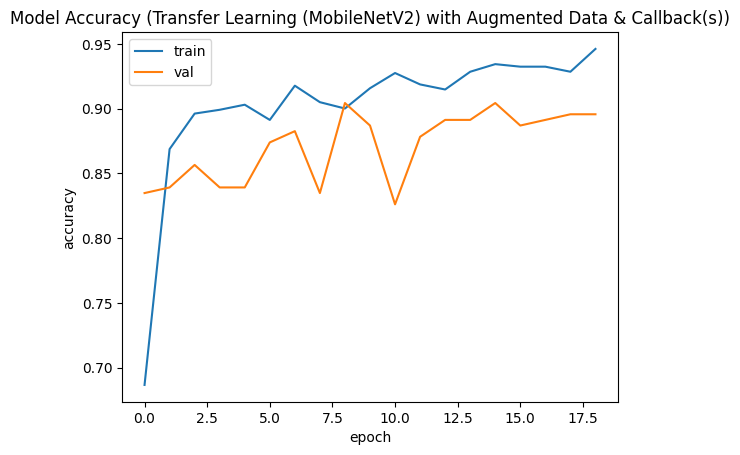

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Transfer Learning (MobileNetV2) with Augmented Data & Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

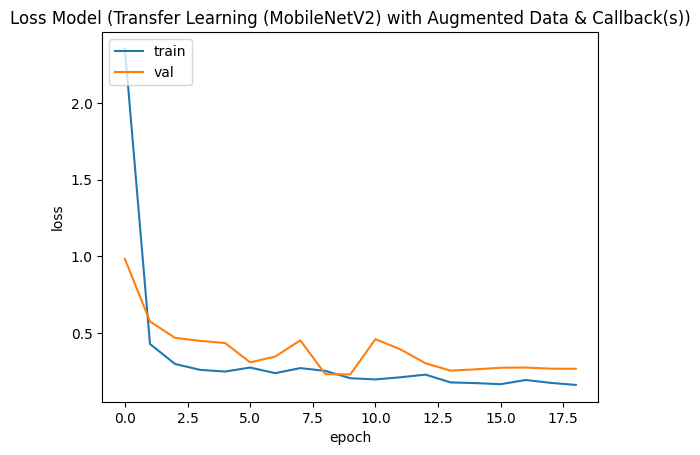

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Transfer Learning (MobileNetV2) with Augmented Data & Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [33]:
!zip -r /content/tomato_mobilenetv2.zip /content/checkpoint/mobilenetv2

  adding: content/checkpoint/mobilenetv2/ (stored 0%)
  adding: content/checkpoint/mobilenetv2/variables/ (stored 0%)
  adding: content/checkpoint/mobilenetv2/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/checkpoint/mobilenetv2/variables/variables.index (deflated 76%)
  adding: content/checkpoint/mobilenetv2/assets/ (stored 0%)
  adding: content/checkpoint/mobilenetv2/fingerprint.pb (stored 0%)
  adding: content/checkpoint/mobilenetv2/saved_model.pb (deflated 91%)
  adding: content/checkpoint/mobilenetv2/keras_metadata.pb (deflated 96%)


In [34]:
files.download("/content/tomato_mobilenetv2.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Transfer Learning (Densenet121) with Augmented Data & Callback(s)**

In [35]:
from tensorflow.keras.applications import DenseNet121

In [36]:
model = tf.keras.models.Sequential([
    # DenseNet121 Layer
    DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3)),
    # Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(4, activation='softmax') 
])

model.layers[0].trainable = False

29084464/29084464 [==============================] - 2s 0us/step


In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_max_pooling2d_2 (Glo  (None, 1024)             0         
 balMaxPooling2D)                                                
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               262400    
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 7,300,932
Trainable params: 263,428
Non-trainable params: 7,037,504
______________________________________

In [38]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [39]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=80,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

In [40]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(224, 224))

Found 1021 images belonging to 4 classes.
Found 230 images belonging to 4 classes.


In [41]:
# Defining Callbacks

# Save the best model
file_path = '/content/checkpoint/densenet121'
checkpoint_callback = ModelCheckpoint(filepath=file_path, save_best_only=True, monitor='val_accuracy', verbose=2)

# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=2, min_lr=1e-6)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [42]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
    )

Epoch 1/50
32/32 [==============================] - ETA: 0s - loss: 1.5268 - accuracy: 0.7453
Epoch 1: val_accuracy improved from -inf to 0.84783, saving model to /content/checkpoint/densenet121
32/32 [==============================] - 79s 2s/step - loss: 1.5268 - accuracy: 0.7453 - val_loss: 2.7366 - val_accuracy: 0.8478 - lr: 0.0010
Epoch 2/50
32/32 [==============================] - ETA: 0s - loss: 0.6830 - accuracy: 0.8521
Epoch 2: val_accuracy did not improve from 0.84783
32/32 [==============================] - 15s 475ms/step - loss: 0.6830 - accuracy: 0.8521 - val_loss: 0.5564 - val_accuracy: 0.8478 - lr: 0.0010
Epoch 3/50
32/32 [==============================] - ETA: 0s - loss: 0.5218 - accuracy: 0.8472
Epoch 3: val_accuracy improved from 0.84783 to 0.88261, saving model to /content/checkpoint/densenet121
32/32 [==============================] - 65s 2s/step - loss: 0.5218 - accuracy: 0.8472 - val_loss: 0.3163 - val_accuracy: 0.8826 - lr: 0.0010
Epoch 4/50
32/32 [===============

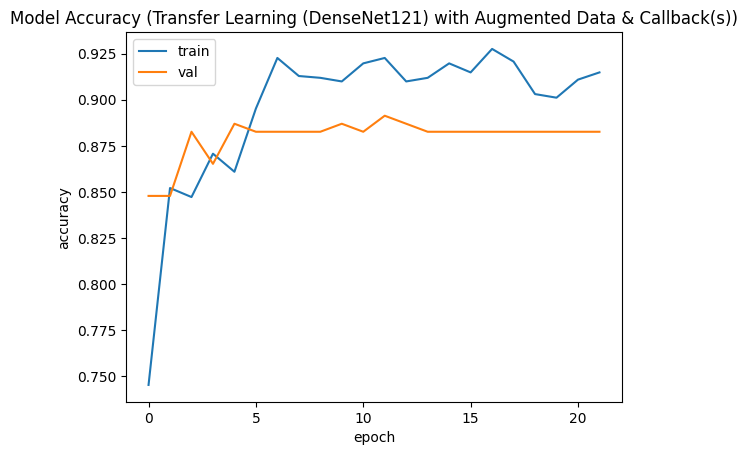

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Transfer Learning (DenseNet121) with Augmented Data & Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

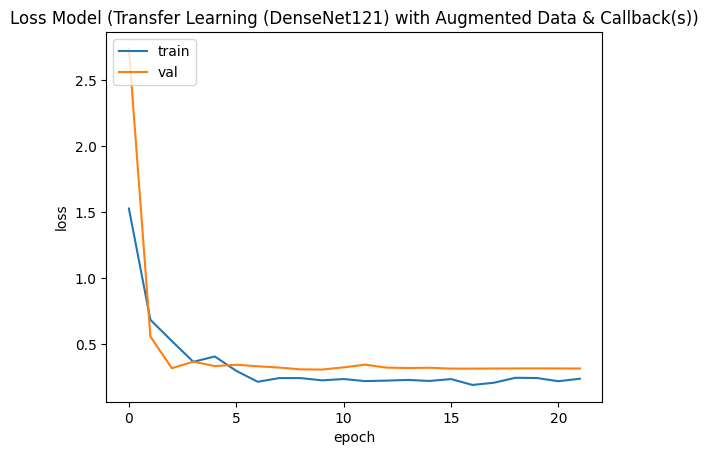

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Transfer Learning (DenseNet121) with Augmented Data & Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [45]:
!zip -r /content/tomato_densenet121.zip /content/checkpoint/densenet121

  adding: content/checkpoint/densenet121/ (stored 0%)
  adding: content/checkpoint/densenet121/variables/ (stored 0%)
  adding: content/checkpoint/densenet121/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/checkpoint/densenet121/variables/variables.index (deflated 78%)
  adding: content/checkpoint/densenet121/assets/ (stored 0%)
  adding: content/checkpoint/densenet121/fingerprint.pb (stored 0%)
  adding: content/checkpoint/densenet121/saved_model.pb (deflated 92%)
  adding: content/checkpoint/densenet121/keras_metadata.pb (deflated 96%)


In [46]:
files.download("/content/tomato_densenet121.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>